### <span style="color:#0ab49a">Занятие №8:</span> <span style="color:#BA77D8">Numpy</span> 

![](img/banner.png)

### <span style="color:#55628D">1. C++</span>

### <span style="color:#55628D">2. Нативная интерпретация</span>

In [24]:
from random import random
import time

# Полностью аналогичный код - умножение матриц, написанное на "чистом Python-е".
# Все операции выполняются "руками", матрицы хранятся в list-ах list-ов.
# Работает, разумеется, сильно медленнее, чем на C++.
# Насколько сильно - стоит измерить.

def init_matrix(m):
    size = len(m)
    for i in range(0, size):
        for j in range(0, size):
            m[i][j] = random()


def print_matrix(m):
    for row in m:
        print(row)


def mult(c, a, b):
    size = len(c)
    for i in range(0, size):
        for j in range(0, size):
            c[i][j] = 0
            for k in range(0, size):
                c[i][j] += a[i][k]*b[k][j]


def func1(N):
    a = [[0] * N for i in range(N)]
    b = [[0] * N for i in range(N)]
    c = [[0] * N for i in range(N)]

    init_matrix(a)
    init_matrix(b)

    start_time = time.time()
    mult(c, a, b)
    elapsed_time = time.time() - start_time

    return elapsed_time

N = 256
print(f"Затраченное время: {func1(N)}")

Затраченное время: 2.1927297115325928


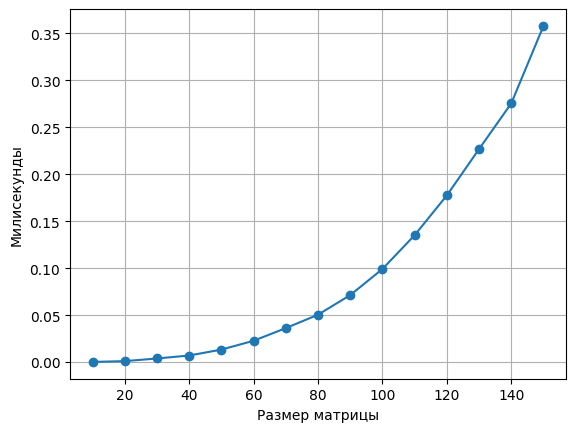

In [25]:
import matplotlib.pyplot as plt

x = [10*i for i in range(1, 16)]
y = [func1(i) for i in x]

plt.plot(x, y, marker='o')
plt.xlabel("Размер матрицы")
plt.ylabel("Милисекунды")
plt.grid()
plt.show()

### <span style="color:#55628D">3. Знакомство с Numpy</span>

In [26]:
from random import random
import numpy as np
import time

# А теперь возьмём NumPy-ные массивы для хранения данных. Они же должны быть быстрые.
# Все операции всё ещё выполняются "руками", так что чудес насчёт скорости не ждём.
# Но всё-таки должно же стать лучше.
# (Спойлер: не станет. Будет хуже, причём сильно. Насколько - можно измерить. Почему - вспоминаем обсуждение.)

def init_matrix(m):
    size = len(m)
    for i in range(0, size):
        for j in range(0, size):
            m[i][j] = random()


def print_matrix(m):
    for row in m:
        print(row)


def mult(c, a, b):
    size = len(c)
    for i in range(0, size):
        for j in range(0, size):
            c[i][j] = 0
            for k in range(0, size):
                c[i][j] += a[i][k]*b[k][j]


def func2(N):
    a = np.zeros((N, N))
    b = np.zeros((N, N))
    c = np.zeros((N, N))

    init_matrix(a)
    init_matrix(b)

    start_time = time.time()
    mult(c, a, b)
    elapsed_time = time.time() - start_time

    return elapsed_time

N = 256
print(f"Затраченное время: {func2(N)}")

Затраченное время: 11.663368701934814


### <span style="color:#55628D">4. Нормальное знакомство с Numpy</span>

In [30]:
from random import random
import numpy as np
import time

# А теперь используем NumPy до конца.
# И вот теперь правда станет сильно лучше насчёт скорости работы.
# Насколько - можно измерить. Почему - вспоминаем обсуждение.

def init_matrix(m):
    size = len(m)
    m[:] = np.random.rand(size, size)


def print_matrix(m):
    for row in m:
        print(row)


def mult(c, a, b):
    np.matmul(a, b, out=c)


def func3(N):
    a = np.zeros((N, N))
    b = np.zeros((N, N))
    c = np.zeros((N, N))

    init_matrix(a)
    init_matrix(b)

    start_time = time.time()
    mult(c, a, b)
    elapsed_time = time.time() - start_time

    return elapsed_time

N = 256
t = func3(N)
print(f"Затраченное время: {t} (в милисекундах: {round(t * 1e3)})")

Затраченное время: 0.0022993087768554688 (в милисекундах: 2)


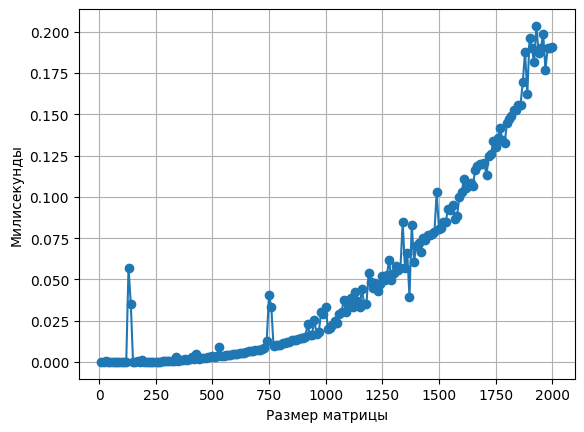

In [31]:
import matplotlib.pyplot as plt

x = [10*i for i in range(1, 201)]
y = [func3(i) for i in x]

plt.plot(x, y, marker='o', label='Numpy')
plt.xlabel("Размер матрицы")
plt.ylabel("Милисекунды")
plt.grid()
plt.show()

### <span style="color:#55628D">5. Более питонячий код</span>

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import time

def time_spend_spread(func):
    def func_return(*args, **kwargs):
        ax = kwargs['ax']
        label = kwargs['label']

        
        
        def local_timer(N):
            a = np.random.random((N, N))
            b = np.random.random((N, N))
    
            start_time = time.time()
            func(N, a, b)
            return time.time() - start_time


        

        start_time_total = time.time()
        x = [rate*i for i in range(1, int(max_n // rate + 1))]
        y = [local_timer(i) for i in x]
        print(f"Функция {func.__name__} выполнена за {time.time() - start_time_total} секунд")
    
        ax.plot(x, y, label=label)
    return func_return

In [33]:
@time_spend_spread
def func4(N, a, b):
    c = np.zeros((N, N))
    np.matmul(a, b, out=c)

@time_spend_spread
def func5(N, a, b):
    c = np.dot(a, b)

@time_spend_spread
def func6(N, a, b):
    c = a @ b

Функция func4 выполнена за 2.9325411319732666 секунд
Функция func5 выполнена за 2.9007022380828857 секунд
Функция func6 выполнена за 2.998337507247925 секунд


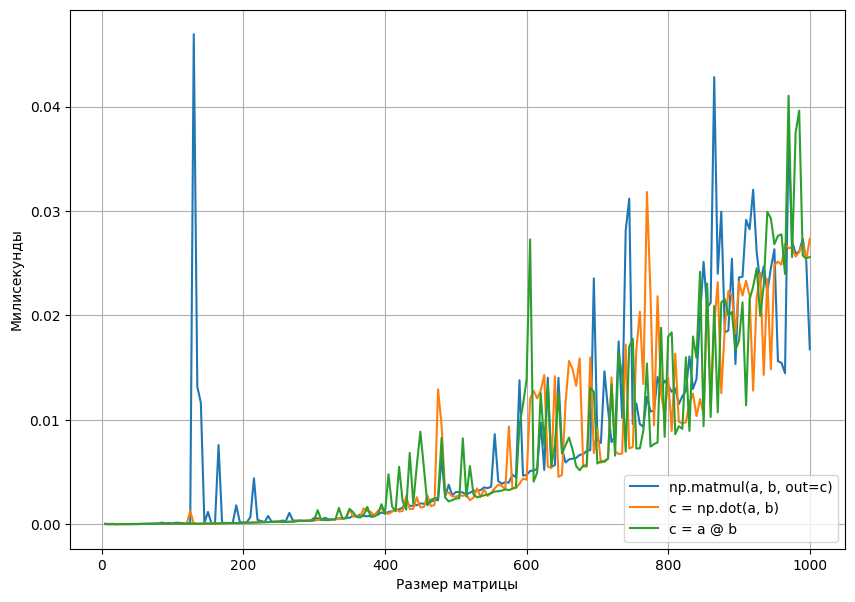

In [34]:
max_n = 1000
rate = 5

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

func4(ax=ax, label="np.matmul(a, b, out=c)")
func5(ax=ax, label="c = np.dot(a, b)")
func6(ax=ax, label="c = a @ b")

plt.xlabel("Размер матрицы")
plt.ylabel("Милисекунды")
plt.legend()
plt.grid()
plt.show()

In [35]:
import numpy as np
import time

N = 5000
a = np.random.random((N, N))
b = np.random.random((N, N))
c = np.zeros((N, N))

start_time_total = time.time()
np.matmul(a, b, out=c)
print(f"Функция matmul выполнена за {time.time() - start_time_total} секунд")

start_time_total = time.time()
d = a @ b
print(f"Функция a @ b выполнена за {time.time() - start_time_total} секунд")

Функция matmul выполнена за 2.8846206665039062 секунд
Функция a @ b выполнена за 3.149782180786133 секунд


### <span style="color:#0ab49a">Примечание №1.</span> <span style="color:#BA77D8">Векторное умножение</span> 

In [38]:
import time

def timer(func):
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()
        value = func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        if is_print:
            print(f'Выполнена функция "{func.__name__}" за {run_time:.4f} секунд')
        return run_time
    return wrapper_timer

In [40]:
import numpy as np

@timer
def np_cross(a, b, N):
    for _ in range(N):
        anw = np.cross(a, b)

@timer
def my_cross(a, b, N):
    for _ in range(N):
        anw = np.array([a[1] * b[2] - a[2] * b[1],
                        a[2] * b[0] - a[0] * b[2],
                        a[0] * b[1] - a[1] * b[0]])

@timer
def my_cross_2(a, b, N):
    for _ in range(N):
        a_, b_ = a.tolist(), b.tolist()
        anw = np.array([a_[1] * b_[2] - a_[2] * b_[1],
                        a_[2] * b_[0] - a_[0] * b_[2],
                        a_[0] * b_[1] - a_[1] * b_[0]])

In [41]:
N = int(1e5)
is_print = True

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

np_cross(a, b, N)
my_cross(a, b, N)
my_cross_2(a, b, N)

None

Выполнена функция "np_cross" за 2.1156 секунд
Выполнена функция "my_cross" за 0.1906 секунд
Выполнена функция "my_cross_2" за 0.1010 секунд


**Вопрос:** как это можно улучшить?

### <span style="color:#0ab49a">Примечание №2.</span> <span style="color:#BA77D8">Pandas.apply()</span> 

In [42]:
import time

def timer(func):
    def wrapper_timer(*args, **kwargs):
        start_time = time.perf_counter()
        value = func(*args, **kwargs)
        end_time = time.perf_counter()
        run_time = end_time - start_time
        if is_print:
            print(f'Выполнена функция "{func.__name__}" за {run_time:.4f} секунд')
        return run_time
    return wrapper_timer

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_data(N):
    return pd.DataFrame({'A': [i + 1 for i in range(N)],
                         'B': [i * 2 for i in range(N)],
                         'C': [i / 2 for i in range(N)]})

@timer
def pandas_apply(N):
    data = get_data(N)
    data.apply(lambda x: x**power)

@timer
def pandas_apply_2(N):
    data = get_data(N)**power

@timer
def numpy_apply(N):
    data = get_data(N)
    tmp = data.to_numpy()

    tmp = tmp**power
    
    data = pd.DataFrame(data=tmp, index=data.index)

@timer
def numpy_apply_2(N):
    data = get_data(N)
    tmp = np.array(data)

    tmp = tmp**power
    
    data = pd.DataFrame(data=tmp, index=data.index)

@timer
def numpy_apply_3(N):
    data = get_data(N)
    data = pd.DataFrame(data=data.to_numpy()**power, index=data.index)

In [47]:
N = 1e4
power = 2
is_print = True

pandas_apply(int(N))
pandas_apply_2(int(N))
numpy_apply(int(N))
numpy_apply_2(int(N))
numpy_apply_3(int(N))

None

Выполнена функция "pandas_apply" за 0.0206 секунд
Выполнена функция "pandas_apply_2" за 0.0109 секунд
Выполнена функция "numpy_apply" за 0.0075 секунд
Выполнена функция "numpy_apply_2" за 0.0062 секунд
Выполнена функция "numpy_apply_3" за 0.0071 секунд


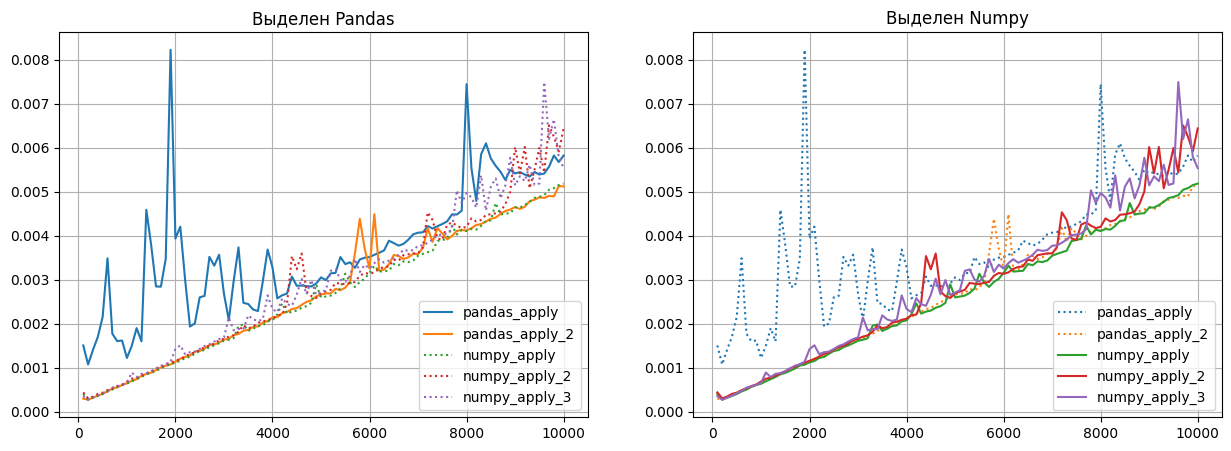

In [53]:
n = 100
m = 1e4
power = 2
is_print = False

x = [(i + 1) * m / n for i in range(n)]
yp1 = [pandas_apply(int(i)) for i in x]
yp2 = [pandas_apply_2(int(i)) for i in x]
yn1 = [numpy_apply(int(i)) for i in x]
yn2 = [numpy_apply_2(int(i)) for i in x]
yn3 = [numpy_apply_3(int(i)) for i in x]


fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    axs[i].plot(x, yp1, "-:"[i], label="pandas_apply")
    axs[i].plot(x, yp2, "-:"[i], label="pandas_apply_2")
    axs[i].plot(x, yn1, ":-"[i], label="numpy_apply")
    axs[i].plot(x, yn2, ":-"[i], label="numpy_apply_2")
    axs[i].plot(x, yn3, ":-"[i], label="numpy_apply_3")
    axs[i].set_title(["Выделен Pandas", "Выделен Numpy"][i])
    axs[i].legend()
    axs[i].grid()
plt.show()

### <span style="color:#0ab49a">Примечание №3.</span> <span style="color:#BA77D8">Порядок важен</span> 

ref: https://www.modular.com/blog/row-major-vs-column-major-matrices-a-performance-analysis-in-mojo-and-numpy <br>
(для любознательных) лекция о подгрузке данных: https://www.youtube.com/watch?v=WDIkqP4JbkE&t=693s

In [55]:
@timer
def max_rows(N):
    a = np.random.rand(int(N), int(N))
    seq = range(int(N)) if not random_choice else np.random.randint(0, int(N), int(N))
    for i in seq:
        b = a[i, :].max()
        
@timer
def max_columns(N):
    a = np.random.rand(int(N), int(N))
    seq = range(int(N)) if not random_choice else np.random.randint(0, int(N), int(N))
    for i in seq:
        b = a[:, i].max()

In [57]:
N = 1e4
is_print = True
random_choice = True

max_rows(N)
max_columns(N)

None

Выполнена функция "max_rows" за 0.9576 секунд
Выполнена функция "max_columns" за 1.8555 секунд


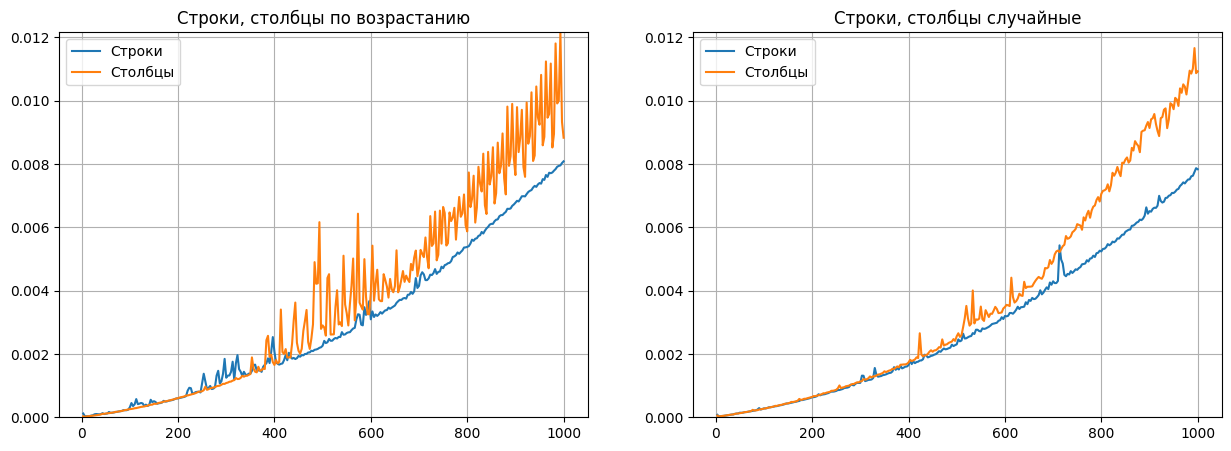

In [59]:
n = 300
m = 1e3
is_print = False

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
max_y = 0.
for i in range(2):
    random_choice = bool(i)
    
    x = [(i + 1) * m / n for i in range(n)]
    y1 = [max_rows(int(i)) for i in x]
    y2 = [max_columns(int(i)) for i in x]
    max_y = max(max_y, max(y1))
    max_y = max(max_y, max(y2))
    
    
    axs[i].plot(x, y1, label="Строки")
    axs[i].plot(x, y2, label="Столбцы")
    axs[i].legend()
    axs[i].grid()
    axs[i].set_title("Строки, столбцы " + ['по возрастанию', 'случайные'][i])

axs[0].set_ylim([0, max_y])
axs[1].set_ylim([0, max_y])
plt.show()

---
---

In [61]:
input_1 = "5 5"
input_2 = "2"
input_3 = ["1 1 1", "4 4 2"]

In [78]:
import numpy as np

N, M = map(int, input().split())
K = int(input())

a = np.zeros((N, M), dtype=np.int8)
for i in range(K):
    X, Y, D = map(int, input().split())
    for j in range(X - D, X + D + 1):
        for k in range(Y - D, Y + D + 1):
            if j >= 0 and j < N and k >= 0 and k < M:
                a[j, k] = 1

print(N * M - a.sum())

8


array([[1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1]], dtype=int8)

In [99]:
import numpy as np

N, M = map(int, input().split())
K = int(input())

a = np.zeros((N, M), dtype=np.int8)
for i in range(K):
    X, Y, D = map(int, input().split())
    x1 = X-D if X-D >= 0 else 0
    y1 = Y-D if Y-D >= 0 else 0
    a[x1:X+D+1, y1:Y+D+1] = 1

print(N * M - a.sum())

8


array([[1, 1, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 1, 1]], dtype=int8)

---
---

In [108]:
input_1 = "4 6"
input_2 = ["1  4  4  2  1  1",
           "0  0  1  0 -1 -1",
           "-2 -3 -1 -5 -6 -4",
           "-1 -3 -3 -4 -4 -2"]

In [124]:
import numpy as np

N, M = map(int, input_1.split())
a = np.zeros((N, M), dtype=np.int8)

for i in range(N):
    a[i, :] = list(map(int, input_2[i].split()))

print(len(a[a < -5]))
print(- a[a < 0].sum())
print(a.max())

1
40
4


---
---

In [126]:
input_1 = 'lesson08/A.dat'
input_2 = 'lesson08/B.dat'
input_3 = '0.5 0.1 0.5'

In [151]:
import numpy as np

path_A = input_1
path_B = input_2
X = np.array(list(map(float, input_3.split())))

N = len(X)
A = np.zeros((N, N))
b = np.zeros(N)

with open(path_A) as f:
    for i, line in enumerate(f):
        A[i] = [float(j) for j in line.split()]
with open(path_B) as f:
    b[0:N] = [float(j) for j in f.read().split()]

print((A @ X) @ b)

0.275


In [154]:
print([float((A @ X)[i] * b[i]) for i in range(len(X))])

[0.125, 0.025000000000000005, 0.125]
